# Johan Knarreborg - Analysis

## Formula One - 50 years of racing, 1044 races and 853 different drivers, but who has been the best driver?

Is the best driver the one that has scored the most points? Has won the most races? Or the one to go fastest around the most tracks? 

Over the years formula one cars has evolved. New tracks has come and gone and the point system has changed. This makes it difficult to compare these question directly between all of the drivers. In this analysis we will try to seperate the drivers performance from the cars performance, the specific track and other variables not related to the drivers performance. 

Things we will be looking at are: 

- Most average points scored per race 

- Average finish position 

- Best at getting pole position 

- Least crashes per race 

- Best Performance compared to team mate 

- Most races  


For each of these parameters we will give the top ten drivers a score from 10 to 1. We will then be able to sum these scores and see who is the overall best driver. 

Since drivers who have only participated in few races would be able to score well in some of these parameters, we will only look at drivers who has participated in more than 40 races, which is around two seasons. Therefore in the analysis 'drivers' means drivers that have been driving more than 40 races. 


In [1]:
#Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from analysis1_pipeline import pipeline
import seaborn as sns

#running my pipeline function
pipeline("../data/raw/","../data/processed/Johan_Processed/")

#Importing the processed data
drivers = pd.read_csv("../data/processed/Johan_Processed/drivers.csv")
qualifying = pd.read_csv("../data/processed/Johan_Processed/qualifying.csv")
results_races =    pd.read_csv("../data/processed/Johan_Processed/results_races.csv") 
driversFiltered = pd.read_csv("../data/processed/Johan_Processed/drivers2.csv") 
overall_driver = pd.read_csv("../data/processed/Johan_Processed/overall_driver.csv") 

In [2]:
#setting the seaborn theme 
sns.set_theme(style="whitegrid")

### A first look at differences between drivers
To get some insights into how much of a difference there is between the drivers we will look at how much difference there is between the amount of point that drivers score on average. 


Total amount of drivers in formula one is: 853 

Total amount of drivers that have driven more than 40 races in formula one is: 177 

The amount of these drivers that have scored more than zero points are: 173 

The percentage of all drivers that has scored more than zero points is: 20.3 %

Variance for average amount of points scored is: 8.97 

A boxplot of the average points scored by each diver: 


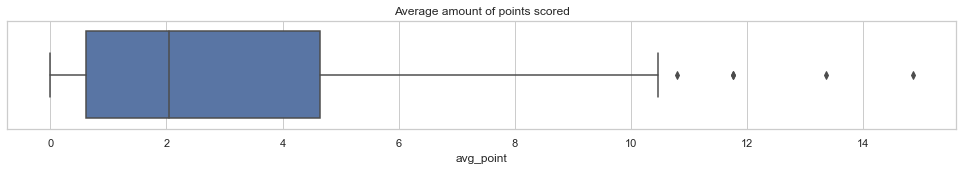

In [3]:
#Looking at the difference between the average amount of points scored per race for each driver and showing a boxplot. 
avg_point = (
    results_races[["driverId","points"]]
    .copy()
    .groupby("driverId")
    .mean()
    .reset_index() 
    .rename(columns={"points":"avg_point"})
    )

#removing drivers that have participated in less than 40 races. 
avg_point = avg_point.loc[avg_point["driverId"].isin(driversFiltered["driverId"])]

#plotting the top ten drivers
f = plt.figure(figsize=[17,2])
box = sns.boxplot(x=avg_point["avg_point"])
plt.title("Average amount of points scored")
print("Total amount of drivers in formula one is:",len(drivers),"\n")
print("Total amount of drivers that have driven more than 40 races in formula one is:",len(avg_point),"\n")
print("The amount of these drivers that have scored more than zero points are:",len(avg_point[avg_point["avg_point"]!=0]),"\n")
print("The percentage of all drivers that has scored more than zero points is:",round(len(avg_point[avg_point["avg_point"]!=0])/len(drivers)*100,1),"%\n")
print("Variance for average amount of points scored is:", round(avg_point["avg_point"].var(),2),"\n")
print("A boxplot of the average points scored by each diver: ")

This variance shows that there is a relatively large spread in the average amount of points scored by the drivers in formula one.

In the boxplot it is clear that the vast majority of drivers score few points. And that few drivers out of the 853 drivers have scored a large amount of points on average. We see that only a handfull of people are outliers in this boxplot, with one driver domininating the others with more than 14 points on average. 

In [4]:
top_driver = pd.merge(avg_point,drivers[["driverId","driverRef"]],on="driverId",how="left").sort_values(by="avg_point",ascending = False).reset_index()
top_driver[["avg_point","driverRef"]].head(10)

,avg_point,driverRef
0,14.854545,hamilton
1,13.368774,fangio
2,11.761596,vettel
3,11.751623,michael_schumacher
4,10.797580,prost
5,10.464231,clark
6,10.297476,max_verstappen
7,10.152606,senna
8,10.000000,stewart
9,8.953892,bottas


The driver that scored the most points on average is Lewis Hamilton who is driving for mercedes. Here we have an equal mix of more recent and older drivers. We will give these ten driver points from 1-10. 

In [5]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in top_driver["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 



---

#### Average finish position for each driver
Another way to normalize this is to look at the average finishing position of each driver. Since this is one of the most important paramters, we will also give the top ten drivers here points from 1-10. 

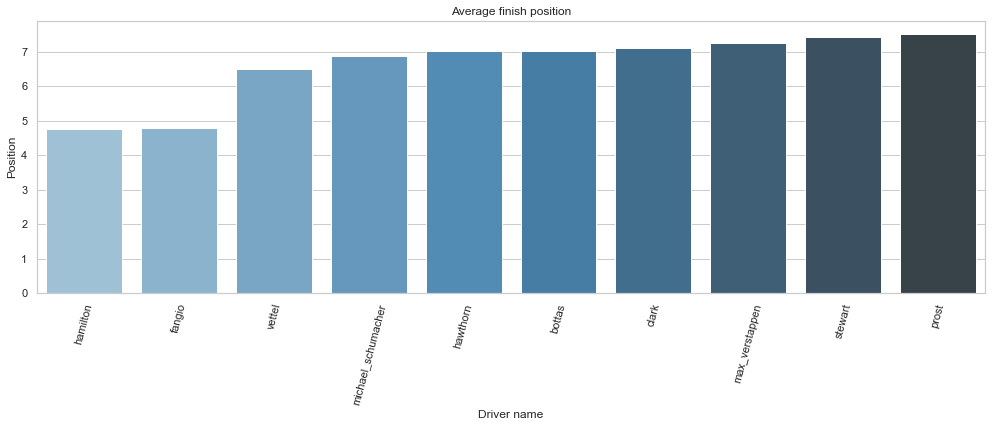

In [6]:
driver_finish = results_races[["driverId","driverRef","positionOrder"]].copy() 
driver_finish_mean = driver_finish.groupby("driverId").mean().reset_index()
driver_finish_mean = pd.merge(driver_finish_mean,drivers[["driverId","driverRef"]], on="driverId",how="left").sort_values(by="positionOrder",ascending=True)

#removing drivers that have participated in less than 40 races. 
driver_finish_mean = driver_finish_mean.loc[driver_finish_mean["driverId"].isin(driversFiltered["driverId"])]

#plotting the top ten drivers 
f = plt.figure(figsize=[17,5])
ax = sns.barplot(x=driver_finish_mean["driverRef"][0:10], y=driver_finish_mean["positionOrder"][0:10], data=driver_finish_mean,palette="Blues_d")
plt.xticks(rotation=75)
plt.ylabel("Position")
plt.xlabel("Driver name")
plt.title("Average finish position");

In [7]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in driver_finish_mean["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 

Here we see that this mixes it up a bit, but most the same drivers are in here. 


---

### Who is the best driver during qualifying

To get pole position you need to set the fastest lap around the track during qualifying. This is all about setting one fast lap time and not about being the best during a whole race. 

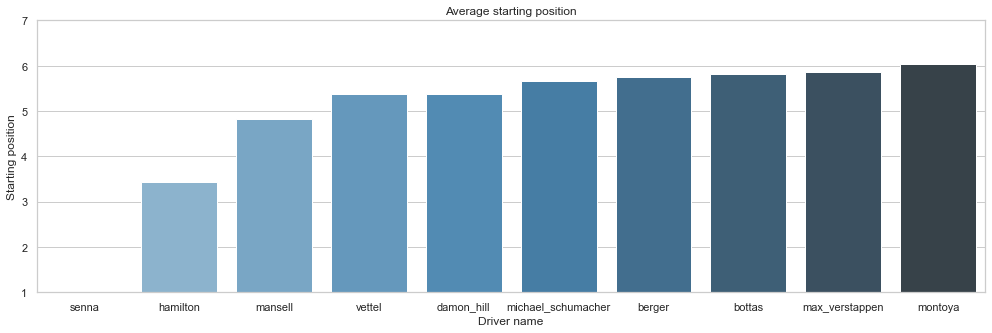

In [8]:
#finding the mean qualifying position
quali_driver = qualifying.copy()
quali_driver_mean = ( 
    quali_driver
    .groupby("driverId")
    .mean()
    .reset_index()
    [["driverId","position"]]
    )
quali_driver_mean = pd.merge(quali_driver_mean,drivers[["driverId","driverRef"]], on ="driverId" ,how = "left")

#removing drivers that have participated in less than 40 races. 
quali_driver_mean = quali_driver_mean.loc[quali_driver_mean["driverId"].isin(driversFiltered["driverId"])].sort_values(by="position",ascending = True)

#plotting the top ten drivers
f = plt.figure(figsize=[17,5])
ax = sns.barplot(x=quali_driver_mean["driverRef"][0:10], y=quali_driver_mean["position"][0:10], data=quali_driver_mean[0:10],palette="Blues_d")
plt.ylabel("Starting position")
ax.set(ylim=(1,7))
plt.xlabel("Driver name")
plt.title("Average starting position");

In [9]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in quali_driver_mean["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 

Senna is dominating this category followed by Hamilton. Here we see that Max Verstappen who is leading the current season is 9th best for this parameter. This parameter greatly favour the drivers who has been in the top from their first season and not the ones working their way up. 

---

### Who is better at finishing? 
When driving one of your goals is to not crash and arrive to your destination. While the same cannot be directly tranferred to racing it is a factor we could take a look at. 

We will see who finish the largest amount of the races that they participate in. 
It should be noted that this favours more recent drivers since the cars has become more reliable. 

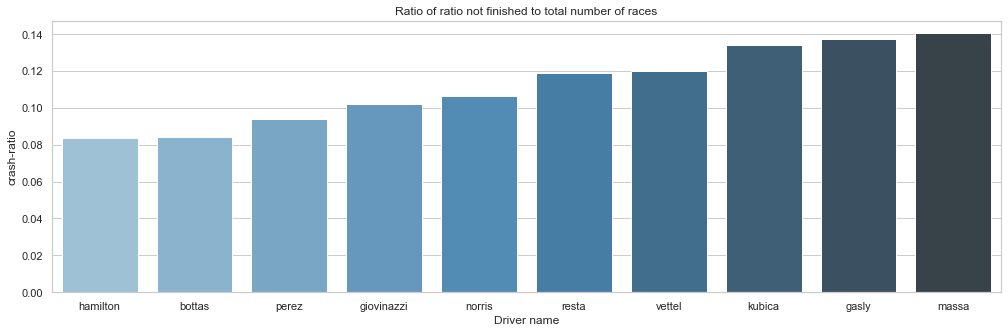

In [10]:
#finding the number of races each driver crashes in and the total number of races
driver_crash = drivers[["driverId","driverRef"]].copy()
driver_crash["crashRatio"]=100 
for i in driversFiltered["driverId"]: 
    if np.size(results_races["positionText"][results_races["driverId"]==i])>15: 
        crashRatio = np.size(results_races["positionText"][results_races["driverId"]==i][results_races["positionText"]=="R"])/np.size(results_races["positionText"][results_races["driverId"]==i])
        driver_crash.loc[driver_crash["driverId"]==i,"crashRatio"]=crashRatio
driver_crash = driver_crash.sort_values(by="crashRatio")  

#plotting the top ten drivers
f = plt.figure(figsize=[17,5])
ax = sns.barplot(x=driver_crash["driverRef"][0:10], y=driver_crash["crashRatio"][0:10], data=driver_crash[0:10],palette="Blues_d")
plt.ylabel("crash-ratio")
plt.xlabel("Driver name")
plt.title("Ratio of ratio not finished to total number of races");

In [11]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in driver_crash["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 


From the plot above we see that the two current merdeces drivers are dominating this parameter, with Hamilton and Bottas being the two most reliabel drivers. 

---

### Best driver compared to team mate 
Drivers has over the years been competing in pairs with almost identical cars from the same constructor. We will therefore take a look at what driver has outperformed his own team mate the most. 

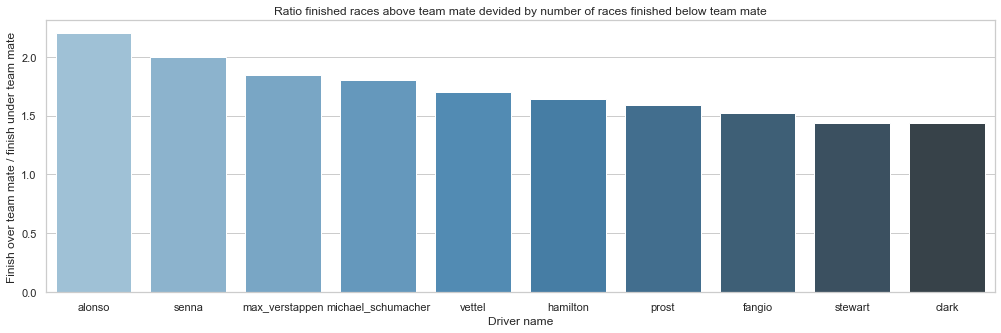

In [12]:
#making the dataframe for finding the ratio of finishing position over team mate
driver_ratio = pd.DataFrame(columns=["driverId"])
driver_ratio["driverId"] =top_driver["driverId"].copy()
driver_ratio["overTeammate"]=0
driver_ratio["underTeammate"]=0

#going through the top 20 drivers in regards to average points scored to find this ratio
for i in top_driver["driverId"][0:20]: 
    over = 0 
    under = 0
    for b in results_races["raceId"][results_races["driverId"]==i]: 
        constructor = results_races[results_races["raceId"]==b]
        constructor= list(constructor.loc[results_races["driverId"]==i,"constructorId"])[0]
        position = results_races[results_races["raceId"]==b]
        position = position.loc(axis=0)[results_races["constructorId"]==constructor].sort_values(by="positionOrder",ascending=True)
        if list(position["driverId"])[0]==i: 
            over = over+1
        else: 
            under = under +1 
        driver_ratio[driver_ratio["driverId"]==i]=[i,over,under]
driver_ratio["ratio"]=driver_ratio["overTeammate"]/driver_ratio["underTeammate"]
driver_ratio = pd.merge(driver_ratio,drivers[["driverId","driverRef"]], on ="driverId" ,how = "left")
driver_ratio = driver_ratio.sort_values(by="ratio",ascending = False)

#plotting the top ten drivers
f = plt.figure(figsize=[17,5])
ax = sns.barplot(x=driver_ratio["driverRef"][0:10], y=driver_ratio["ratio"][0:10], data=driver_ratio[0:10],palette="Blues_d")
plt.ylabel("Finish over team mate / finish under team mate")
plt.xlabel("Driver name")
plt.title("Ratio finished races above team mate devided by number of races finished below team mate");

In [13]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in driver_ratio["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 


--- 

### Most races 

One thing is being a good at driving a race car. However, you also need to be good at finding team and staying on that team. We will therefore look at who has been in the most races. 


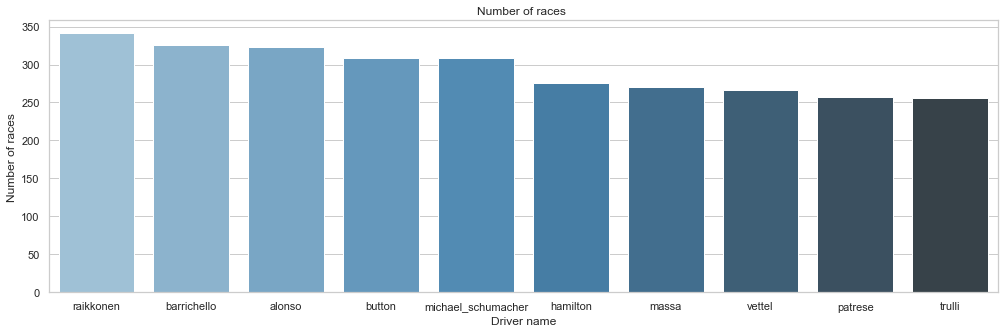

In [14]:
#finding the drivers with most races
driver_races = results_races[["driverId"]].copy()
driver_races = driver_races.groupby("driverId").size().reset_index().rename(columns={0:"#ofRaces"}).sort_values(by="#ofRaces",ascending=False)
driver_races = pd.merge(driver_races,drivers[["driverId","driverRef"]], on="driverId",how="left")

#plotting the top ten drivers
f = plt.figure(figsize=[17,5])
ax = sns.barplot(x=driver_races["driverRef"][0:10], y=driver_races["#ofRaces"][0:10], data=driver_races[0:10],palette="Blues_d")
plt.ylabel("Number of races")
plt.xlabel("Driver name")
plt.title("Number of races ");

In [15]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in driver_races["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 

--- 

## The overall score: 

In [16]:
#sorting the overall_driver df to find the drivers highest scores. 
overall_driver = (overall_driver.sort_values(by="points",ascending = False)
                  .reset_index()
                  .drop(columns=["driverId","index","Unnamed: 0"])
                 )

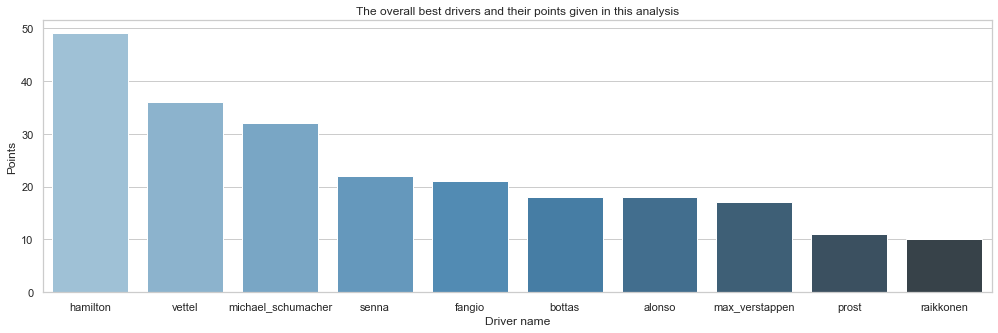

In [17]:
#plotting the top ten drivers
f = plt.figure(figsize=[17,5])
ax = sns.barplot(x=overall_driver["driverRef"][0:10], y=overall_driver["points"][0:10], data=overall_driver[0:10],palette="Blues_d")
plt.ylabel("Points")
plt.xlabel("Driver name")
plt.title("The overall best drivers and their points given in this analysis");

In [18]:
overall_driver.head(10)

,driverRef,points
0,hamilton,49
1,vettel,36
2,michael_schumacher,32
3,senna,22
4,fangio,21
5,bottas,18
6,alonso,18
7,max_verstappen,17
8,prost,11
9,raikkonen,10


According to my analysis Sir Lewis Hamilton is by far the best driver. He is a driver that has been dominating for the past 13 years, where he has 7 championship wins. The same amount of championship wins that Michael Schumacher had in his career. 


However, all the drivers in this top ten are seen as some of the best drivers in formula one. This shows that our analysis has been able to pick out the drivers that are speciel, compared to the other 852 drivers that have been driving in formula one. 

To score high in this final score, each driver has to be in the top ten for most of the paramters looked at. With Sir Lewis Hamilton scoring 49 out of 60 points possible, just shows how steady of a driver he is. 

Therefore, even with my personal bias towards to current championship leading driver Max Verstappen, I will have to conclude that Sir Lewis Hamilton is the best driver that Formual One has seen. 